# HDL Cholesterol Prediction

## Overview

The goal of this model is to predict the amount of directly\-measured HDL Cholesterol \(0\-100\) within a subject\. 

## Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
# load data from github

train = pd.read_csv('https://raw.githubusercontent.com/luminwin/ASASF/main/train.csv')
labels = pd.read_csv('https://raw.githubusercontent.com/luminwin/ASASF/main/variable_labels.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luminwin/ASASF/main/test.csv')

# Explore the Data

In [3]:
train.head()

,Unnamed: 0,LBDHDD_outcome,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,RIAGENDR,INDFMPIR,DMDMARTZ,RIDAGEYR,RIDRETH1,RIDRETH3,BMXBMI,BMXWAIST,ALQ111,ALQ121
0,1,51.169706,1459,39.95,152.46,50.34,13.6,78.41,18.062,29.440,...,2,2.17,1,72,5,7,34.3,115.1,1,10
1,2,64.129747,2116,82.54,213.12,75.49,12.7,103.08,48.495,23.529,...,2,1.03,1,61,2,2,22.6,77.3,1,7
2,3,43.333345,2417,61.59,242.22,69.35,14.7,104.62,30.182,31.087,...,1,3.31,1,40,3,3,27.9,106.5,1,3
3,4,58.853188,2018,39.99,206.45,50.56,17.2,42.75,12.418,13.011,...,2,3.82,1,74,3,3,36.5,112.2,1,1
4,5,40.239688,2331,89.59,307.36,161.17,20.1,85.28,22.278,30.190,...,1,2.58,2,80,3,3,24.9,102.6,1,8


In [4]:
# to better understand each variable included in train dataset

for row in labels.itertuples():
  print(f'variable name: {row.variable:<15} label: {row.label}')

variable name: LBDHDD_outcome  label: Direct HDL-Cholesterol (mg/dL)
variable name: DR1TKCAL        label: Energy (kcal)
variable name: DR1TPROT        label: Protein (gm)
variable name: DR1TCARB        label: Carbohydrate (gm)
variable name: DR1TSUGR        label: Total sugars (gm)
variable name: DR1TFIBE        label: Dietary fiber (gm)
variable name: DR1TTFAT        label: Total fat (gm)
variable name: DR1TSFAT        label: Total saturated fatty acids (gm)
variable name: DR1TMFAT        label: Total monounsaturated fatty acids (gm)
variable name: DR1TPFAT        label: Total polyunsaturated fatty acids (gm)
variable name: DR1TCHOL        label: Cholesterol (mg)
variable name: DR1TATOC        label: Vitamin E as alpha-tocopherol (mg)
variable name: DR1TATOA        label: Added alpha-tocopherol (Vitamin E) (mg)
variable name: DR1TRET         label: Retinol (mcg)
variable name: DR1TVARA        label: Vitamin A, RAE (mcg)
variable name: DR1TACAR        label: Alpha-carotene (mcg)
varia

In [5]:
train.info() #they're all numbers which is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1000 non-null   int64  
 1   LBDHDD_outcome  1000 non-null   float64
 2   DR1TKCAL        1000 non-null   int64  
 3   DR1TPROT        1000 non-null   float64
 4   DR1TCARB        1000 non-null   float64
 5   DR1TSUGR        1000 non-null   float64
 6   DR1TFIBE        1000 non-null   float64
 7   DR1TTFAT        1000 non-null   float64
 8   DR1TSFAT        1000 non-null   float64
 9   DR1TMFAT        1000 non-null   float64
 10  DR1TPFAT        1000 non-null   float64
 11  DR1TCHOL        1000 non-null   int64  
 12  DR1TATOC        1000 non-null   float64
 13  DR1TATOA        1000 non-null   float64
 14  DR1TRET         1000 non-null   int64  
 15  DR1TVARA        1000 non-null   int64  
 16  DR1TACAR        1000 non-null   int64  
 17  DR1TBCAR        1000 non-null   in

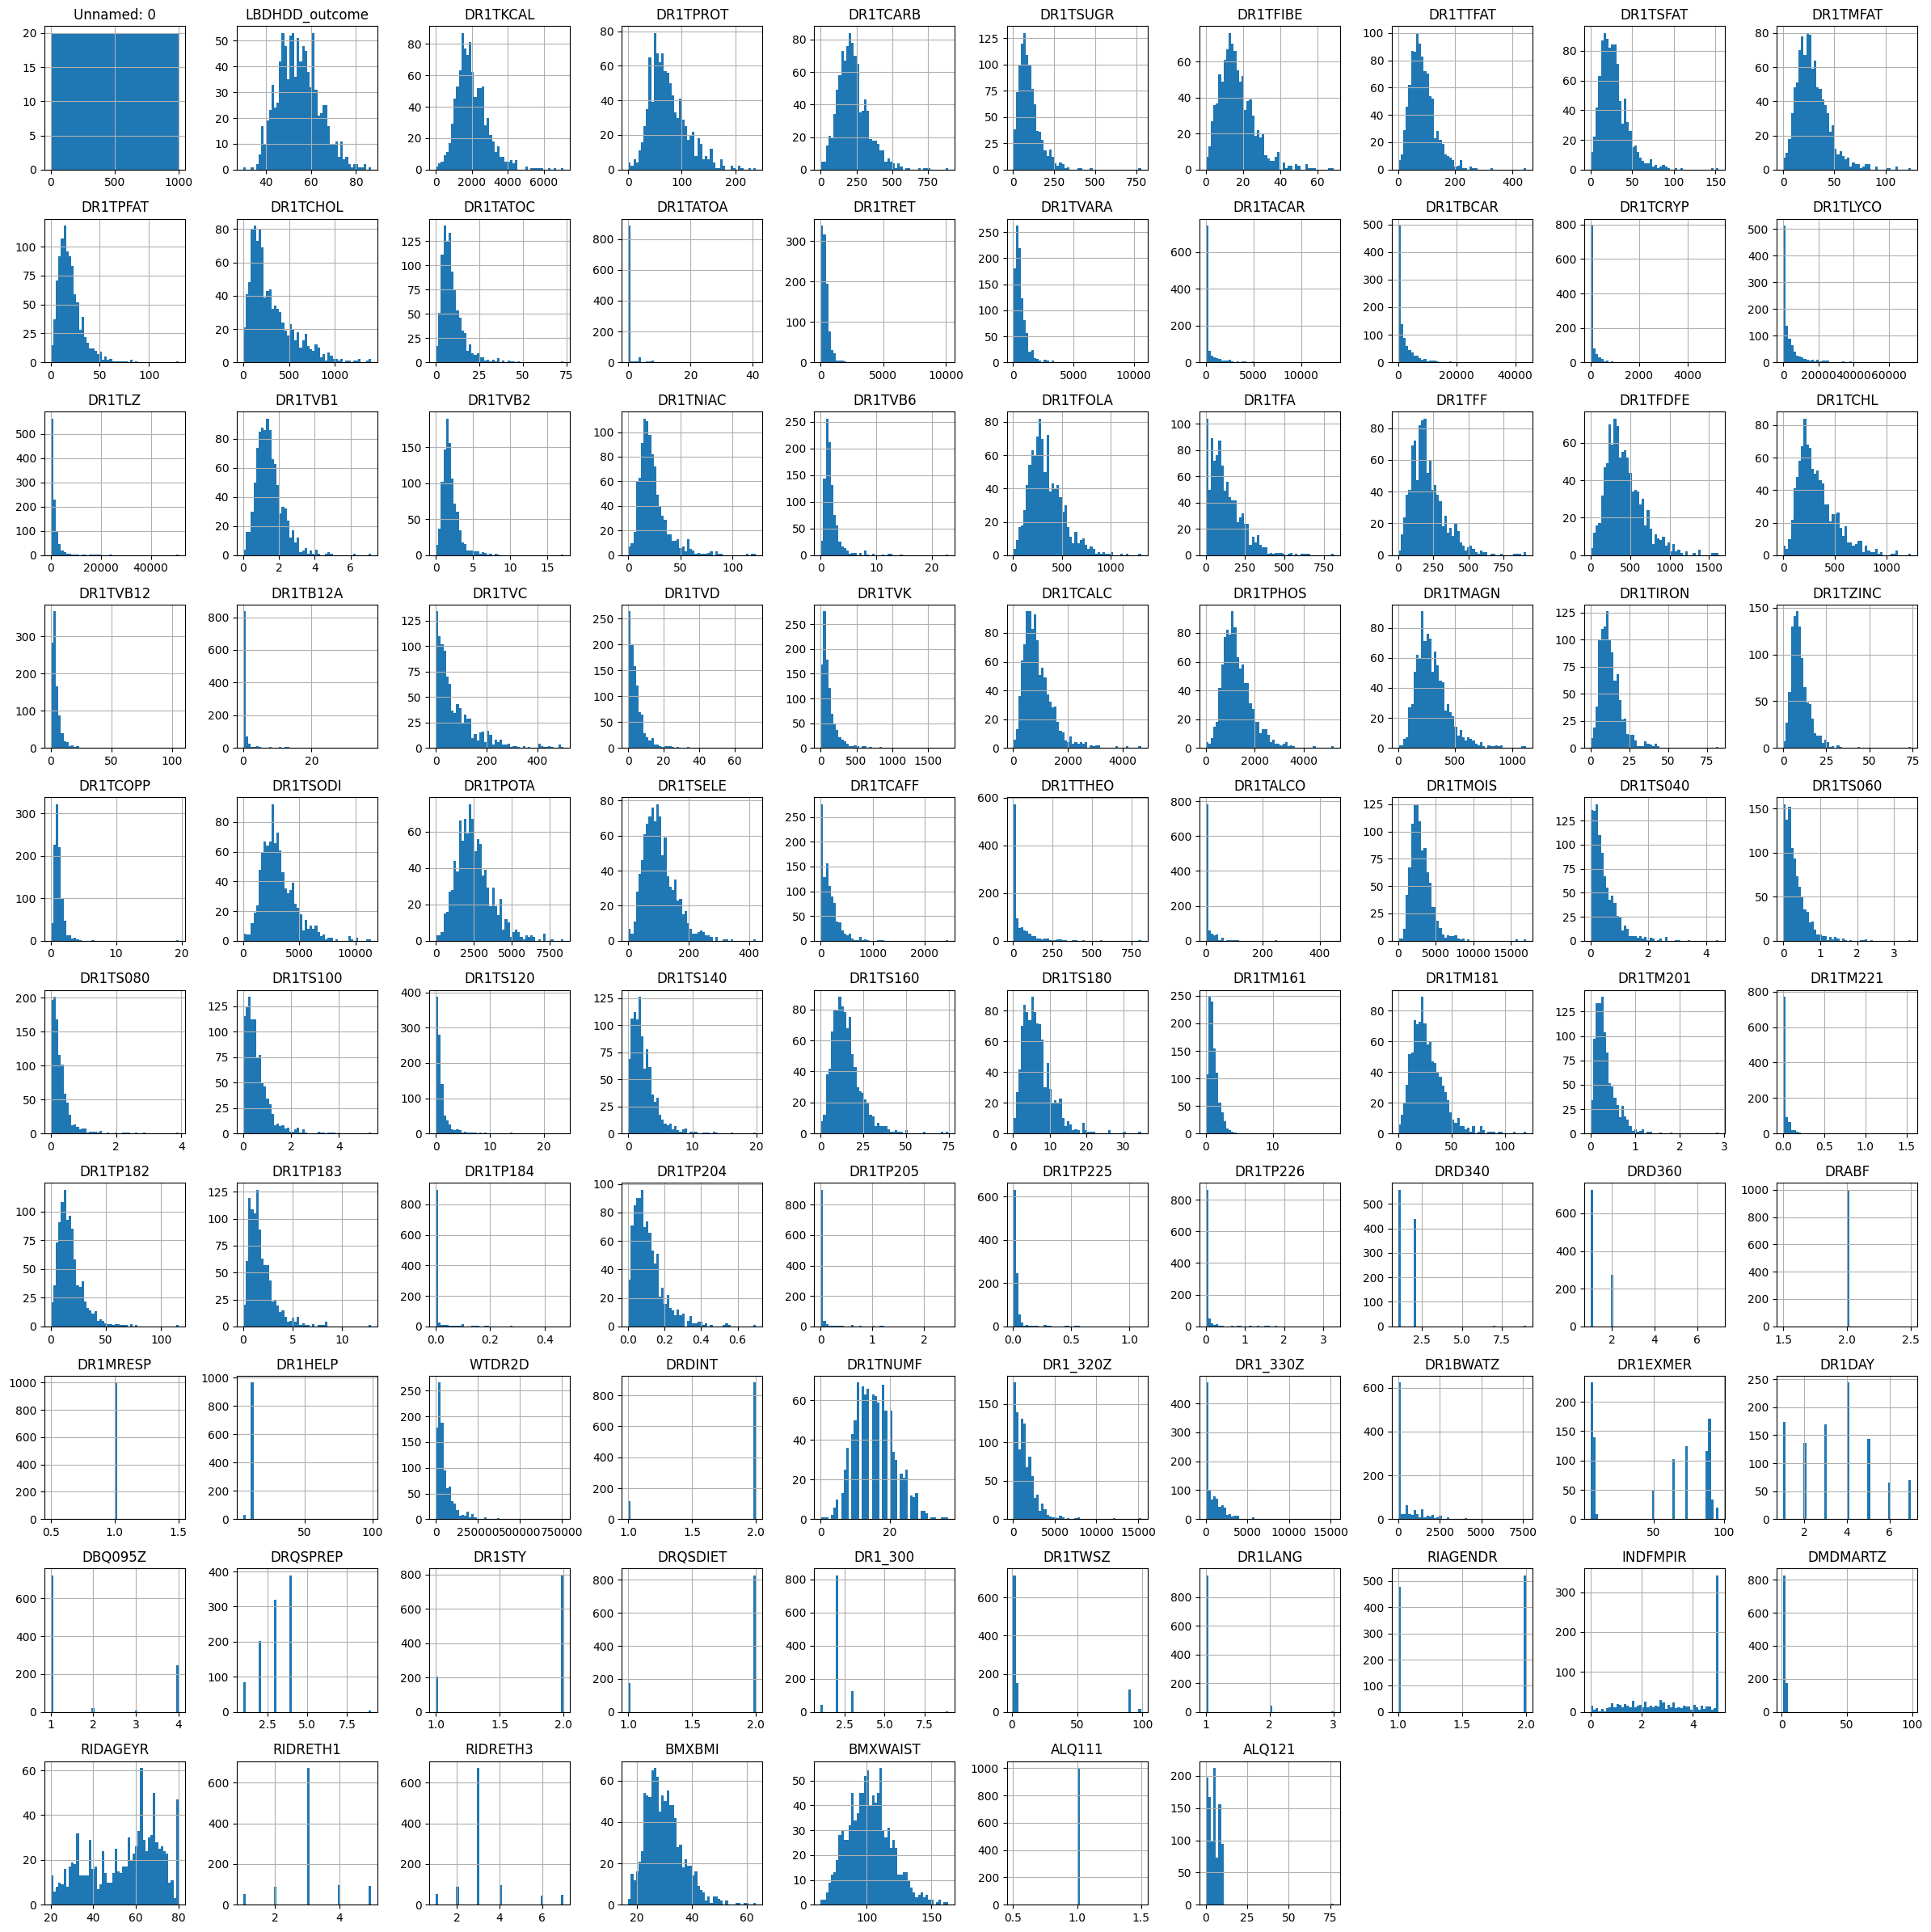

In [6]:
#Histogram for the numerical attributes
train.hist(bins=50, figsize=(24, 24),)
plt.tight_layout()
plt.show()
#Note: Lots of them are skewed the the right

In [22]:
train.describe()

,Unnamed: 0,LBDHDD_outcome,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,RIAGENDR,INDFMPIR,DMDMARTZ,RIDAGEYR,RIDRETH1,RIDRETH3,BMXBMI,BMXWAIST,ALQ111,ALQ121
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,500.500000,54.733860,2020.360000,75.083040,226.424160,96.492660,16.858100,85.609300,27.762500,28.814114,...,1.522000,3.315000,1.670000,54.474000,3.092000,3.233000,30.047200,102.436800,1.0,5.008000
std,288.819436,9.010594,878.567665,35.072536,108.422154,66.904216,9.623927,44.880046,16.849451,15.863507,...,0.499766,1.596234,3.175403,16.255201,0.866191,1.228096,6.741877,16.692296,0.0,4.594676
min,1.000000,30.034304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,16.900000,64.400000,1.0,0.000000
25%,250.750000,47.994034,1440.000000,50.315000,151.147500,51.375000,10.300000,54.540000,15.977000,17.953750,...,1.000000,1.920000,1.000000,40.000000,3.000000,3.000000,25.200000,90.275000,1.0,2.000000
50%,500.500000,54.159576,1882.500000,68.395000,213.020000,82.315000,15.200000,78.365000,24.873500,26.094000,...,2.000000,3.470000,1.000000,59.000000,3.000000,3.000000,29.050000,101.400000,1.0,5.000000
75%,750.250000,60.879150,2491.000000,95.245000,280.710000,124.477500,22.000000,107.657500,35.119000,36.730250,...,2.000000,5.000000,2.000000,67.000000,3.000000,3.000000,33.700000,112.325000,1.0,8.000000
max,1000.000000,86.705504,7090.000000,238.690000,891.920000,775.200000,68.800000,447.630000,153.511000,124.704000,...,2.000000,5.000000,99.000000,80.000000,5.000000,7.000000,63.400000,163.200000,1.0,77.000000


In [23]:

#Looking at the correlations
corr_matrix = train.corr(numeric_only = True)
corr_matrix["LBDHDD_outcome"].sort_values(ascending=False)
#Note: odd how DRABF, DR1MRESP, ALQ111 are NaN

#ALQ111 is NaN since it's all 1
# DRABF is all 1 as well
# DR1MRESP is all 1 as well
# we can effectively ignore all three of these variables 

drop_cols = ['ALQ11', 'DRABF', 'DR1MRESP']

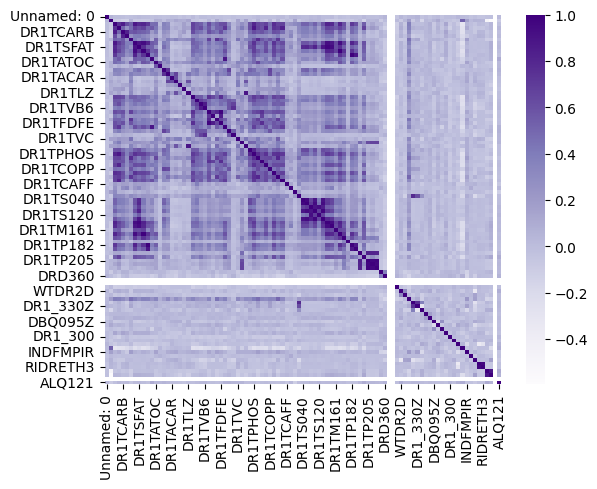

In [27]:
import seaborn as sb
  
sb.heatmap(corr_matrix, cmap="Purples")
plt.savefig("corr.png")

Insights

- ALQ111, DRABF, DR1MRESP can be ignored as they are all 1 and will have no affect on the outcome\.

- Data is heavily skewed right, so we should probably normalize it\.

- Some Data appears categorical see below

In [10]:
# categorical columns to remove/modify due to no significant value in order
# RIDRETH3 - race may play a factor, so we'll use one-hot encoding 
# RIDRETH1 - same as RIDRETH3 but excludes non-Hispanic Asian. more efficient to just use RIDRETH3 and drop this
# DR1HELP - helped in responding for interview, values make no sense but let's see

### 

stuff to l

variable name: WTDR2D          label: Dietary two\-day sample weight
variable name: DRDINT          label: Number of days of intake
variable name: DR1TNUMF        label: Number of foods/beverages reported
variable name: DR1\_320Z        label: Total plain water drank yesterday \(gm\)
variable name: DR1\_330Z        label: Total tap water drank yesterday \(gm\)
variable name: DR1BWATZ        label: Total bottled water drank yesterday \(gm\)
variable name: DR1EXMER        label: Interviewer ID code
variable name: DR1DAY          label: Intake day of the week
variable name: DBQ095Z         label: Type of table salt used
variable name: DRQSPREP        label: Salt used in preparation?
variable name: DR1STY          label: Salt used at table yesterday?
variable name: DRQSDIET        label: On special diet?
variable name: DR1\_300         label: Compare food consumed yesterday to usual
variable name: DR1TWSZ         label: Tap water source
variable name: DR1LANG         label: Language respondent used mostly
variable name: RIAGENDR        label: Gender
variable name: INDFMPIR        label: Ratio of family income to poverty
variable name: DMDMARTZ        label: Marital status
variable name: RIDAGEYR        label: Age in years at screening
variable name: RIDRETH1        label: Race/Hispanic origin
variable name: RIDRETH3        label: Race/Hispanic origin w/ NH Asian
variable name: BMXBMI          label: Body Mass Index \(kg/m\*\*2\)
variable name: BMXWAIST        label: Waist Circumference \(cm\)
variable name: ALQ111          label: Ever had a drink of any kind of alcohol
variable name: ALQ121          label: Past 12 mos how often drink alc bev

In [11]:
## put this all into a list just for easy access

categorical_cols = [
    'WTDR2D',
    'DRDINT',
    'DR1TNUMF',
    'DR1_320Z',
    'DR1_330Z',
    'DR1BWATZ',
    'DR1EXMER',
    'DR1DAY',
    'DBQ095Z',
    'DBQ095Z',
    'DRQSPREP',
    'DR1STY',
    'DRQSDIET',
    'DR1_300',
    'DR1TWSZ',
    'DR1LANG',
    'RIAGENDR',
    'INDFMPIR',
    'DMDMARTZ',
    'RIDAGEYR',
    'RIDRETH1',
    'RIDRETH3',
    'BMXBMI',
    'BMXWAIST',
    'ALQ111',
    'ALQ121'
]



In [12]:
train["DR1HELP"].value_counts() # helped in the interview process -- values make no sense 

DR1HELP
12    964
5      30
8       4
99      1
11      1
Name: count, dtype: int64

In [13]:
train["WTDR2D"].value_counts()

WTDR2D
0.000000         117
21635.816591       2
11729.880275       2
70738.321968       1
26331.587650       1
                ... 
12559.148360       1
30440.358190       1
108757.332136      1
15123.463626       1
30600.729133       1
Name: count, Length: 882, dtype: int64

In [14]:
train['DR1EXMER'].value_counts() # interviewer id -- may be useful in accounting for interviewer biases 

DR1EXMER
5     133
73    125
87    116
90    108
65    103
6     100
7      78
89     64
8      62
49     50
91     33
96     19
9       9
Name: count, dtype: int64

In [36]:
# spearman correlation 

from scipy.stats import spearmanr

corr = {}
var = 'LBDHDD_outcome'

for col in train.columns:
    if col != var: 
        r, p = spearmanr(train[col], train[var])
        corr[col] = {'spearman_r': r, 'p_val': p}
        
results = pd.DataFrame(corr).T
results['abs_r'] = results['spearman_r'].abs()
results = results.sort_values('abs_r', ascending=False)

# create temp df that contains all of results + corresponding variable label 

temp = results.merge(labels, left_index=True, right_on='variable', how='left')
temp = temp.set_index('variable')

temp.head(30)

# from this, it's clear that BMXWAIST (waist circumf), 
# RIAGENDR (gender), and BMXBMI (bmi) will probably be
# the most important regardless of what model we use, esp
# bc the variable w 4th highest r, DR1TALCO (alcohol content
# in diet) has an |r| of 0.28, significantly lower than the 
# top 3 variables. esp considering that |r| < 0.3 is considered 
# a weak correlation 

/root/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,spearman_r,p_val,abs_r,label
variable,,,,
BMXWAIST,-0.605283,5.449623e-101,0.605283,Waist Circumference (cm)
RIAGENDR,0.533947,8.752306e-75,0.533947,Gender
BMXBMI,-0.524987,6.411820e-72,0.524987,Body Mass Index (kg/m**2)
DR1TALCO,0.284290,4.789937e-20,0.284290,Alcohol (gm)
DR1TBCAR,0.201548,1.262373e-10,0.201548,Beta-carotene (mcg)
DR1TNUMF,0.186284,2.930194e-09,0.186284,Number of foods/beverages reported
INDFMPIR,0.179532,1.086017e-08,0.179532,Ratio of family income to poverty
DR1TACAR,0.177889,1.482804e-08,0.177889,Alpha-carotene (mcg)
DR1TLZ,0.168444,8.398466e-08,0.168444,Lutein + zeaxanthin (mcg)


from this, it's clear that BMXWAIST \(waist circumf\), RIAGENDR \(gender\), and BMXBMI \(bmi\) will probably be the most important regardless of what model we use\.

The variable with the 4th highest r coefficient, DR1TALCO \(alcohol content in diet\) has an \|r\| of 0\.28, which is significantly lower than the top 3 variables\.

Considering that \|r\| < 0\.3 is considered a weak correlation, these 3 variables seem to show the most promise

In [39]:
# now show the lowest |r| variables
temp = temp.sort_values('abs_r', ascending=True)
print(temp.head(20)) 

          spearman_r     p_val     abs_r                               label
variable                                                                    
DR1DAY      0.000484  0.987803  0.000484              Intake day of the week
DR1TRET    -0.001407  0.964562  0.001407                       Retinol (mcg)
DR1TS080   -0.002686  0.932398  0.002686             SFA 8:0 (Octanoic) (gm)
DR1STY      0.004054  0.898107  0.004054       Salt used at table yesterday?
DMDMARTZ   -0.004684  0.882385  0.004684                      Marital status
DR1TP184    0.007000  0.825022  0.007000  PFA 18:4 (Octadecatetraenoic) (gm)
DRD360      0.007174  0.820755  0.007174      Fish eaten during past 30 days
DR1TS120   -0.008793  0.781236  0.008793          SFA 12:0 (Dodecanoic) (gm)
DR1TTHEO   -0.011022  0.727744  0.011022                    Theobromine (mg)
DR1TS060   -0.013586  0.667847  0.013586             SFA 6:0 (Hexanoic) (gm)
DR1TS100   -0.014123  0.655552  0.014123            SFA 10:0 (Decanoic) (gm)

In [42]:
# remove unnamed: 0 column too along with the 20 top cols with lowest |r| 
drop_cols.append('Unnamed: 0',)
drop2 = temp.head(20).index.to_list()
drop_cols += drop2 

r: 0.03533237142479664


<Axes: xlabel='DR1HELP', ylabel='LBDHDD_outcome'>

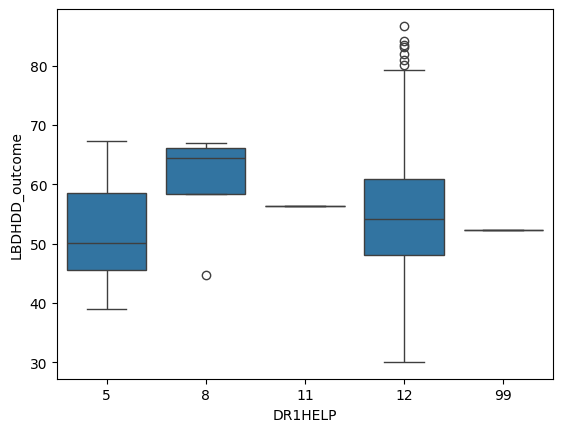

In [54]:
# variable DR1HELP seemed weird when we checked value_counts. 
# lets check a little more closely 

r, _ = spearmanr(train['DR1HELP'], train['LBDHDD_outcome'])
print(f'r: {r}')

# since its categorical, lets use box plot 
sb.boxplot(data=train, x='DR1HELP', y='LBDHDD_outcome')

# very weird distribution of datas + doesnt align with NHANES 
# description of categorical 

In [45]:
train.head()

,Unnamed: 0,LBDHDD_outcome,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,RIAGENDR,INDFMPIR,DMDMARTZ,RIDAGEYR,RIDRETH1,RIDRETH3,BMXBMI,BMXWAIST,ALQ111,ALQ121
0,1,51.169706,1459,39.95,152.46,50.34,13.6,78.41,18.062,29.440,...,2,2.17,1,72,5,7,34.3,115.1,1,10
1,2,64.129747,2116,82.54,213.12,75.49,12.7,103.08,48.495,23.529,...,2,1.03,1,61,2,2,22.6,77.3,1,7
2,3,43.333345,2417,61.59,242.22,69.35,14.7,104.62,30.182,31.087,...,1,3.31,1,40,3,3,27.9,106.5,1,3
3,4,58.853188,2018,39.99,206.45,50.56,17.2,42.75,12.418,13.011,...,2,3.82,1,74,3,3,36.5,112.2,1,1
4,5,40.239688,2331,89.59,307.36,161.17,20.1,85.28,22.278,30.190,...,1,2.58,2,80,3,3,24.9,102.6,1,8


# Prepare the Data

In [ ]:
"""
to do list:
- normalize via standardscaler 
- fix categorical columns list
- drop ridreth1 but keep ridreth3
- drop dr1help 
- drop ratio of family poverty to income? 
"""

In [ ]:
# drop unecessary cols
df_cleaned = 

In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Model the Data

In [ ]:
"""
ok i think we should do 3 diff. models 
since thats usually the standard + we 
can compare results and establish baselines 

my ideas (obviously open to change): 
- xgboost
- tabnet or simple feedforward nn
- random forest
- linear regression (reg. w lasso)? would be good for a "control" model baseline 
- i think we need a control/baseline but its usually just a straight line w slope 0
- thats how we determine p value when doing lienar reg t tests that way julia can have something to talk about! 
- ok sounds good! and i have this connected to my github rn but i can add u guys as collaborators to the repo
- if you arent already 
"""

# Fine\-tune the Model 

# Testing the Model 

In [ ]:
"""
using test df, generate a csv file with one column (pred) w/ predictions 
"""

# Conclusions

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8045aee1-a706-4cad-8423-d400451c04d5' target="_blank">

Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>